<a href="https://colab.research.google.com/github/kanika214/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Team Members Contribution.
# **•	Akash Jaiswal (Leader)**

o	Data Understanding\
o	Feature Analysis \
o	Feature Engineering\
o	Linear Regression Model Building.\
o	Univariate Analysis.\
o	Evaluation Matrix Study.\
o	Box plot Evaluation\
o	Distribution plot analysis.\
o	Technical Documentation

# **•	Kanika Raj**

o	Data Understanding\
o	Feature Analysis\
o	Data Visualization\
o	univariate Analysis\
o	Outliers’ detection\
o	OLS model Building\
o	VIF (variance inflation factor) values calculation.\
o	Technical Documentation

# **•	Abhishek Rana**

o	Data Understanding\
o	Data Visualization\
o	univariate Analysis\
o	Outliers Treatment\
o	Lasso Regression model\
o	OLS model Study and conclusion\
o	Correlation Heatmap building and study.\
o	Technical Documentation

## **•	Jagdish Mahato**

o	Data Understanding\
o	Data Visualization\
o	Handling Null, NAN and duplicate values\
o	Univariate Analysis\
o	Ridge Regression model\
o	Combining results Dictionary and making conclusion.\
o	Understanding the Correlation of Dataset\
o	Technical documentation    





# **Loading Dataset and Importing Neccessary Modules**





In [254]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

##Mounting and importing the datset from google drive


In [255]:
#let's mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
#load the seol bike data set from drive
bike_df=pd.read_csv('/content/drive/MyDrive/data/Seoul_Bike_Data.csv',encoding = 'latin')

# **Exploring and Understanding the Dataset**

##summary of data

In [257]:
#Printing the Dataset
pd.DataFrame(bike_df)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [258]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [259]:
# View the bottom 5 rows to take a glimps of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [260]:
#Getting the shape of dataset with rows and columns
print(bike_df.shape)

(8760, 14)


In [261]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [262]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [263]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [264]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


* ***This Dataset contains 8760 lines and 14 columns.*** 
***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*** 

##Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which is dependent variable here and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






# **Preprocessing the dataset**

##Missing values

The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [265]:
# counting missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

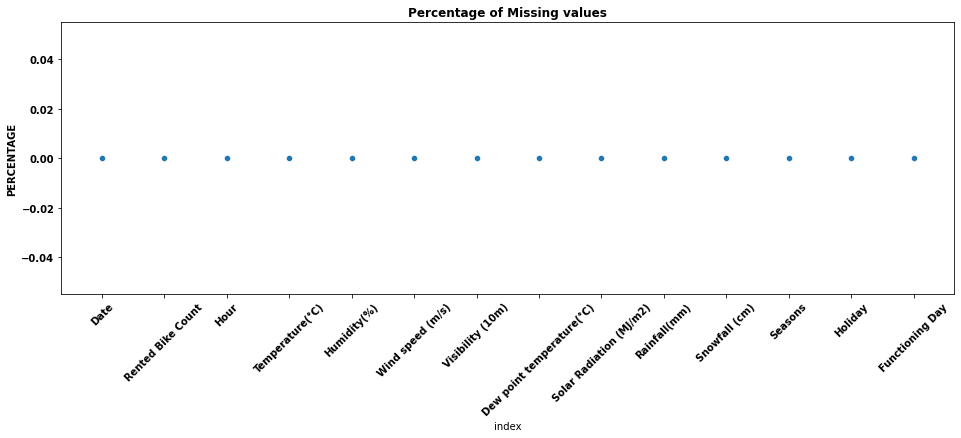

In [266]:
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.scatterplot('index',0,data=missing)
plt.xticks(rotation =45,fontsize =10,Weight='bold')
plt.yticks(fontsize =10,Weight='bold')
plt.title("Percentage of Missing values",Weight='bold')
plt.ylabel("PERCENTAGE",Weight='bold')
plt.show()

* ***As we can see above there are no missing value present in the dataset***

##Checking and removing Duplicate values.


In [267]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


## Renaming the columns for better understanding.

In [268]:
#Changing columns names.
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Splitting 'Date' column

In [269]:
# splitting "Date" column into three other columns like "year","month","day".
bike_df['Date'] = bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [270]:
#formating the Date column.
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [271]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contains the details of data from 2017 december to 2018 november so if we consider this is as one year then we don't need "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

##Changing data type

* ***As "Hour","month","weekdays_weekend" column data are integer data type but actually it should be category data type. so we need to change this data type if we not then, while doing the further anlysis and correletion with this, the values are not actually true so we can mislead by this.***

In [272]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [273]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# **Exploratory Data Analysis Of The Data Set**


* ***Exploratory Data Analysis is a critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.***

##**Analysing categorical variables**
* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

####Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

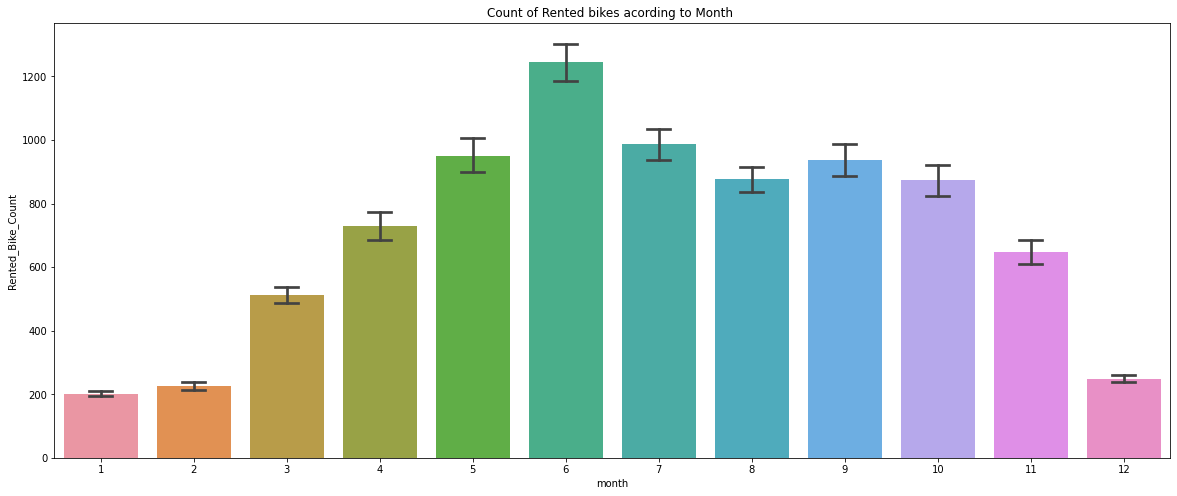

In [274]:
#anlysis of data by vizualisation by Month.
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

* ***From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.***

####weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

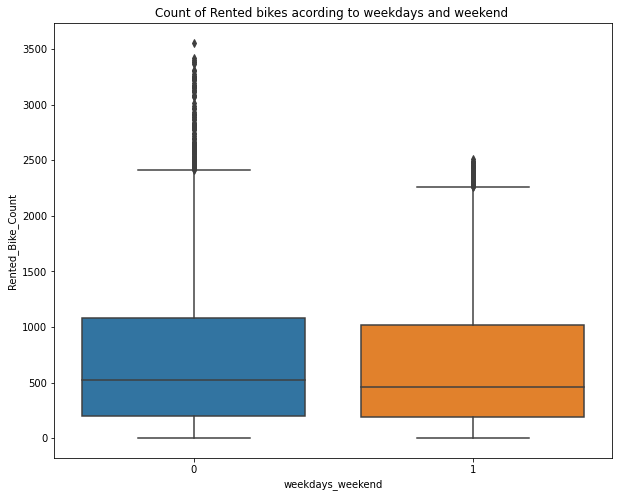

In [275]:
#anlysis of data vizualisation for weekdays_weekend.
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

* ***From the above box plot we can say that in the week days which represent in blue colur shows that the demand of the bike is higher because of the office/college timing.***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but in evening hour  from 4 pm to 8 pm the demand slightly increases.***   

####Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

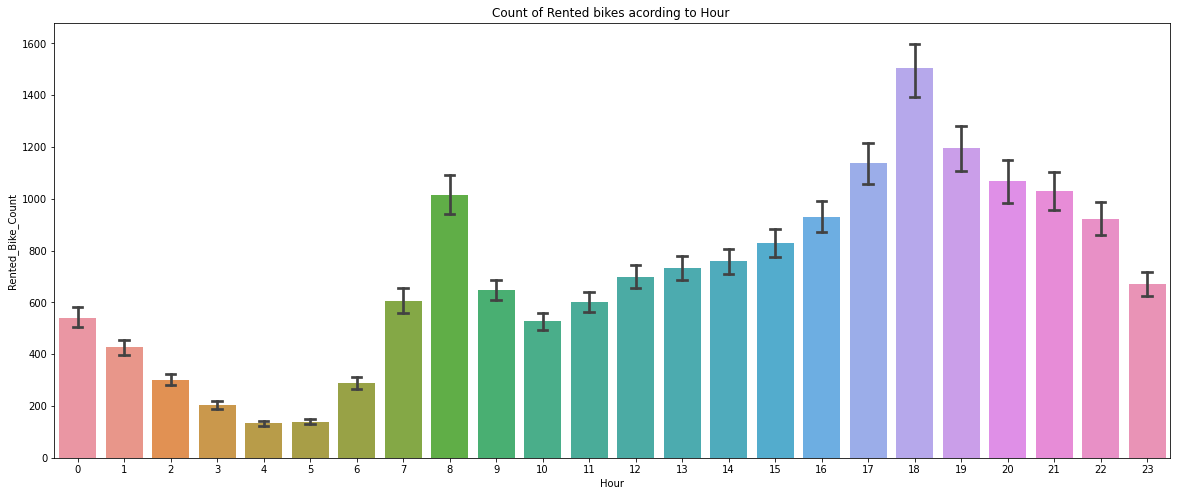

In [276]:
#anlysis of data vizualisation for Hour column.
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

* ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***

####Functioning Day


[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

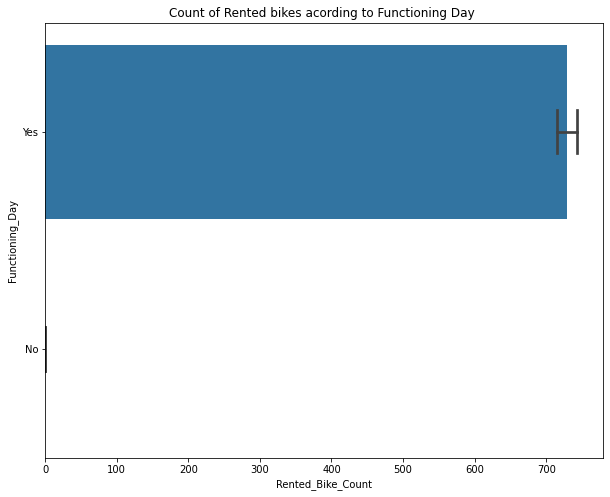

In [277]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Rented_Bike_Count',y='Functioning_Day',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***From the above bar plot and point plot we conclude that, the use of rented bike in functioning days are quite good but in no functioning day People generally do not use reneted bikes.*** 

####Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

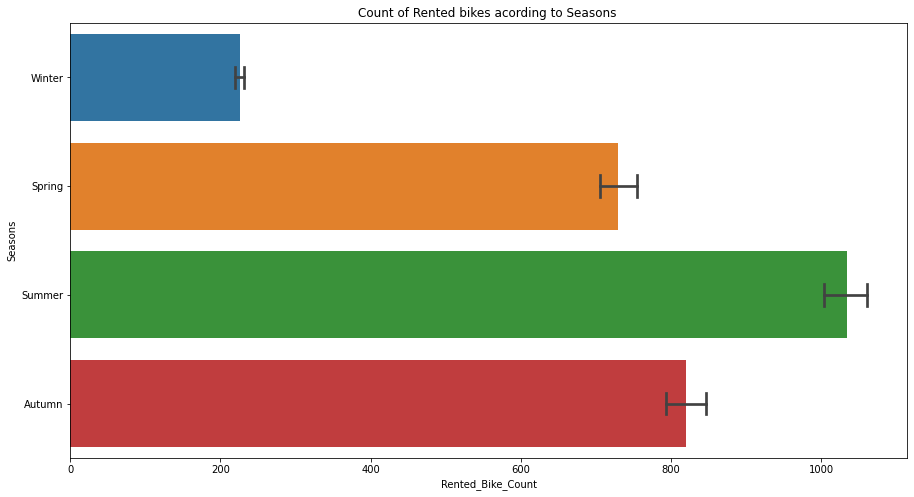

In [278]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Rented_Bike_Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

* ***In the above bar plot shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***

####Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

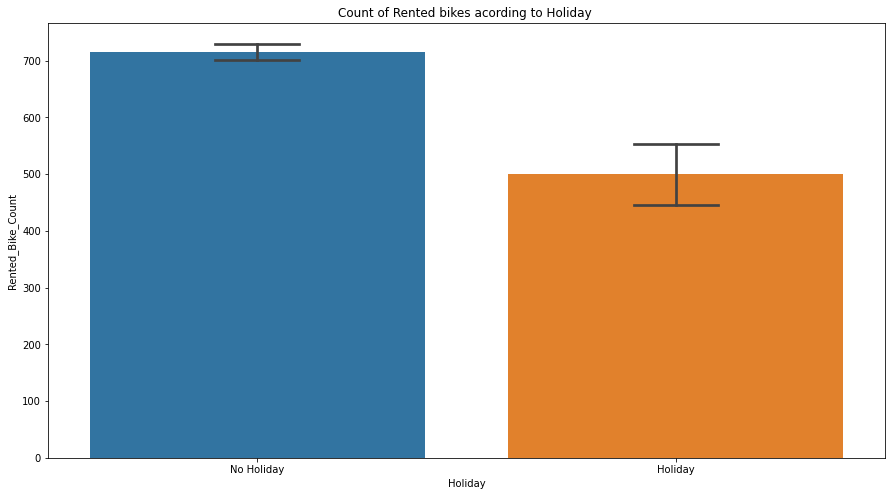

In [279]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***From the above bar plot we conlude that the use of rented bike count is higher in No Holiday as compare to Holiday.***

##**Analysis on Numerical variables/Features**
* Numerical data is always collected in Integer/Number form.

In [280]:
#assign the numerical coulmns to variables.
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

# Data Visualization by using Boxplot to Identify outliers.

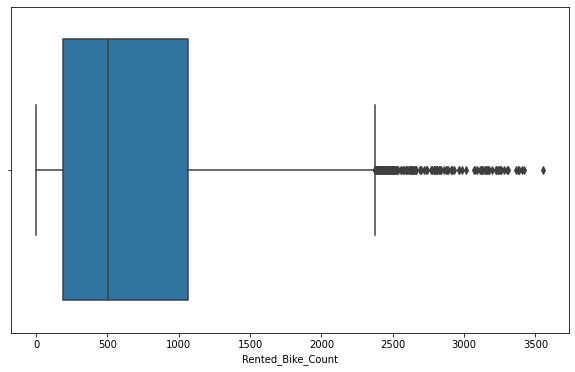

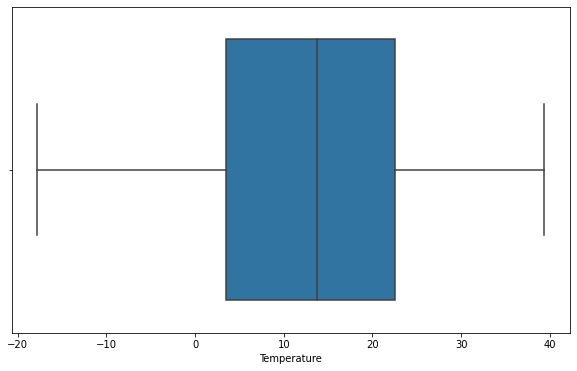

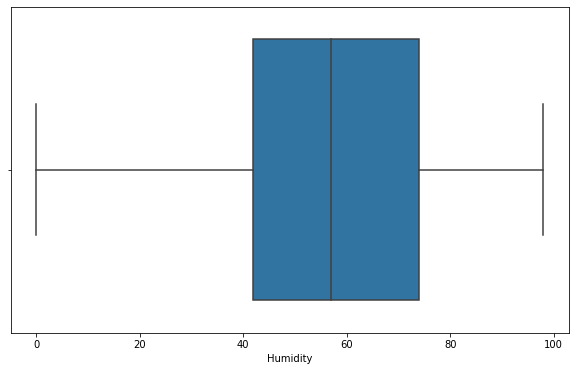

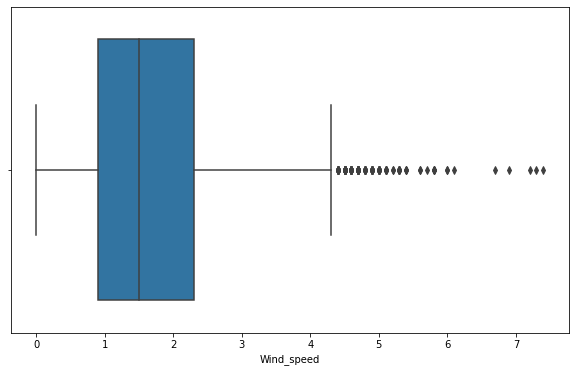

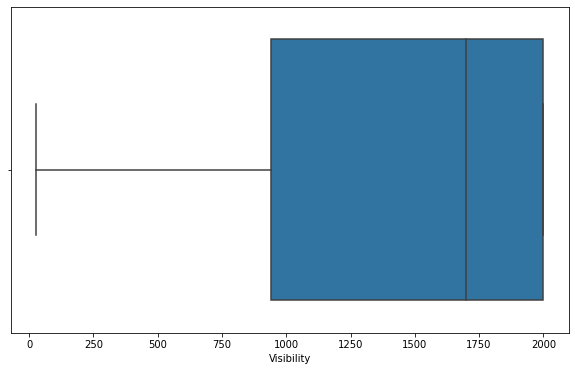

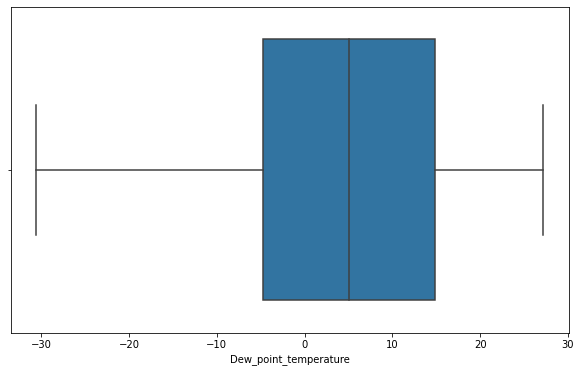

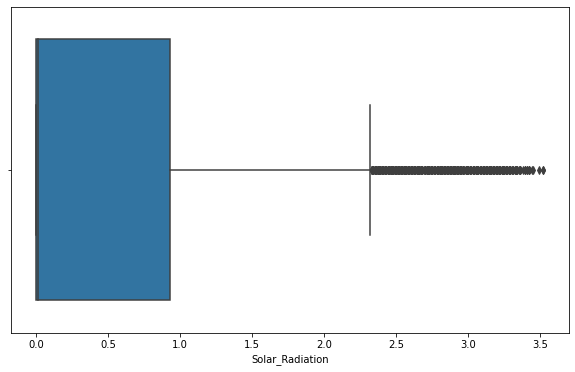

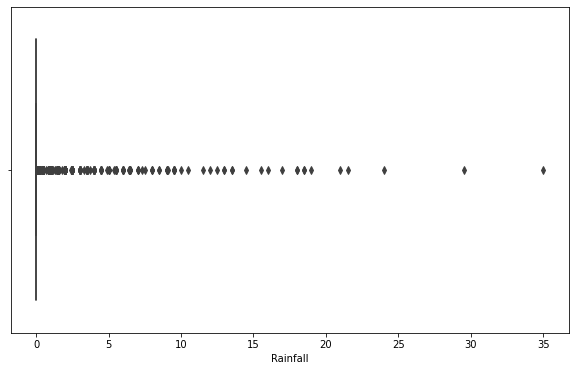

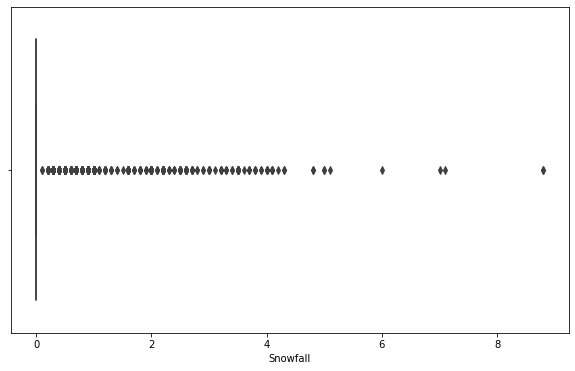

In [281]:
#showing boxplot to analyze the outliers of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#Treating the Outliers

In [282]:
# Capping the columns with most number of outliers

bike_df.loc[bike_df['Rainfall']>=2,'Rainfall']= 2
bike_df.loc[bike_df['Solar_Radiation']>=2,'Solar_Radiation']= 2
bike_df.loc[bike_df['Snowfall']>=1.5,'Snowfall']= 1.5
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4

#Again checking the outliers after capping/Trimming

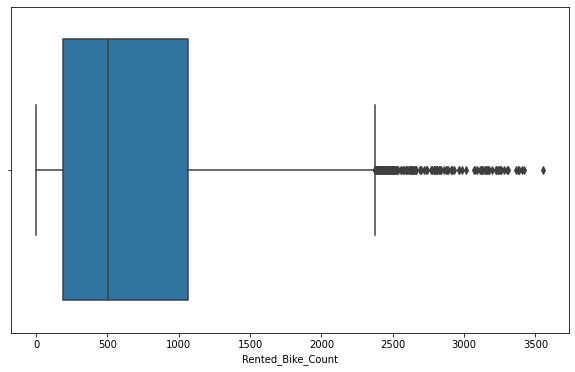

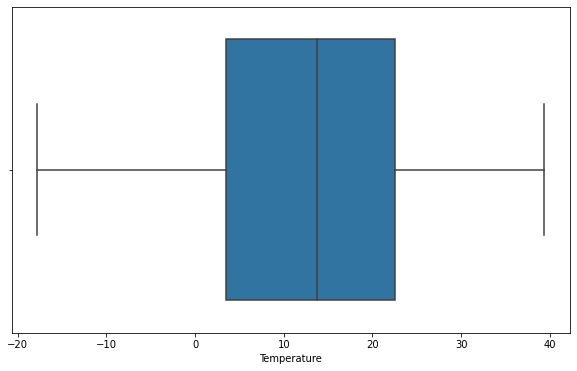

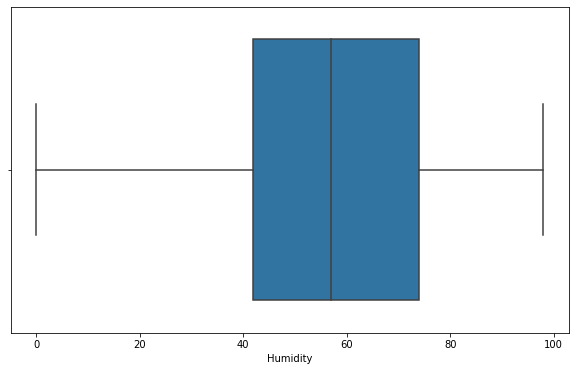

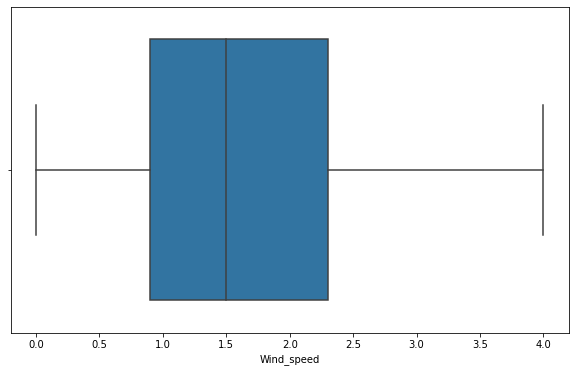

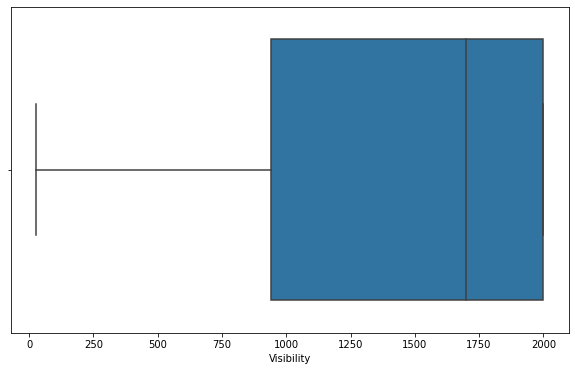

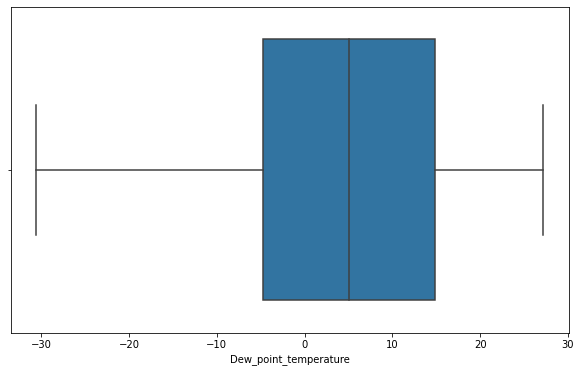

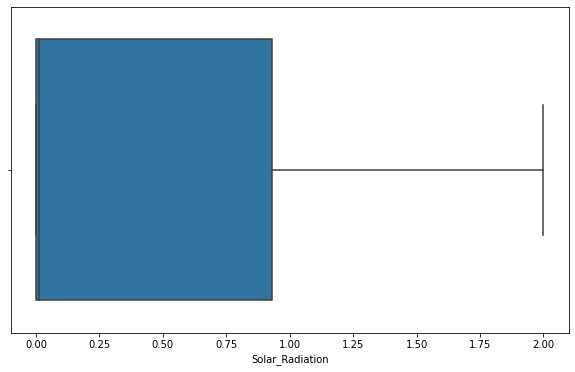

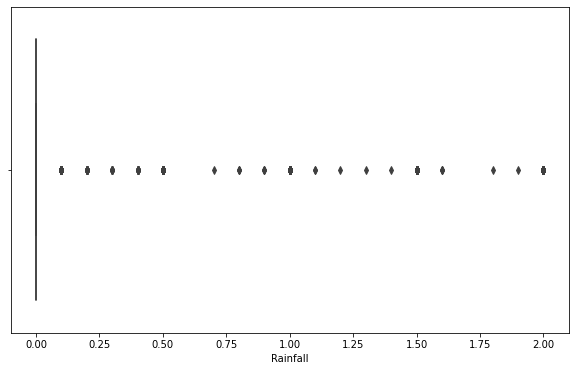

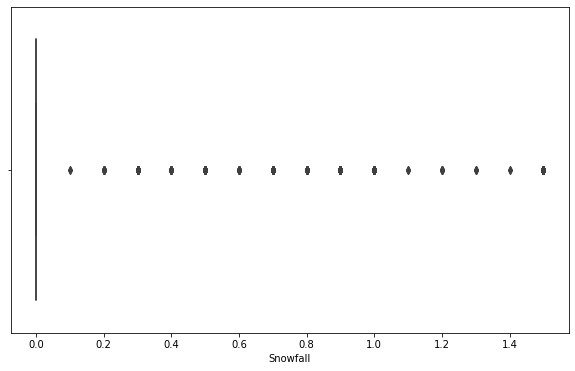

In [283]:
#printing boxplot to analyze the outliers again of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

##### We have capped/Trimmed the outliers as removing them results in loss of data which is not subsequent in real world. Trimming the outliers helps us not to loose data and increase our model accuracy by even more.

#### Numerical vs.Rented_Bike_Count

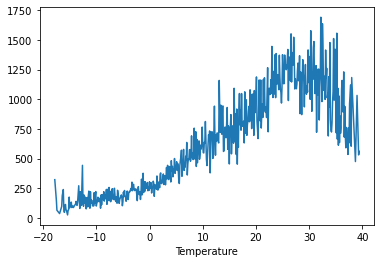

In [284]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

#Checking relationship between dependent and indepedent variables.

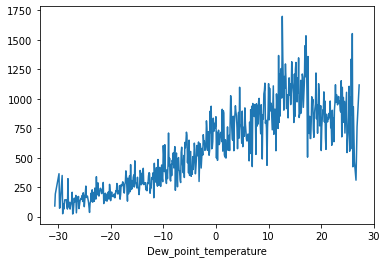

In [285]:
#analysing the relationship using graph between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

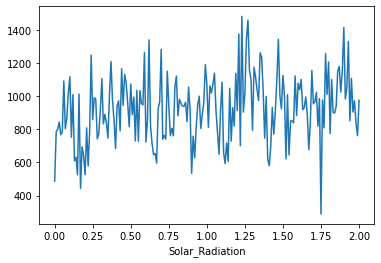

In [286]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***

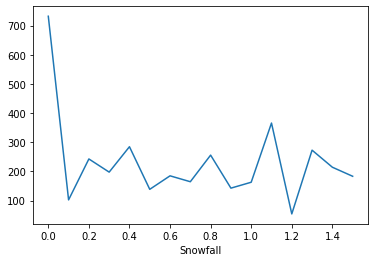

In [287]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is very less***

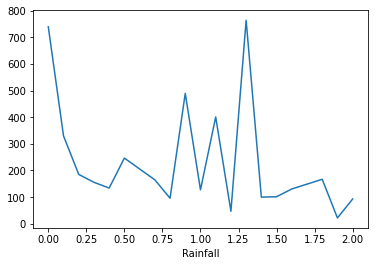

In [288]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* ***We can see from the above plot that even in rainfall the demands of rental bikes are not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.***

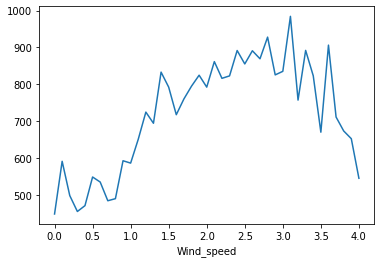

In [289]:
# plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***We can see from the above plot that the demand of rental bike is uniformly distributed in wind_speed it means most of the people uses rental bike in Wind condition.***

##**Transforming Rented_Bike_Count column data**

* ***The data Transformation (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

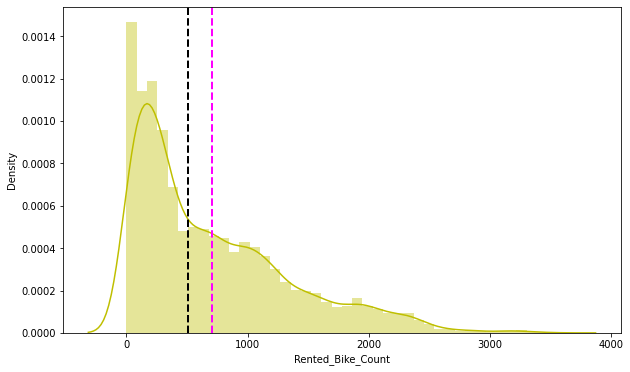

In [290]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to normalize it.***

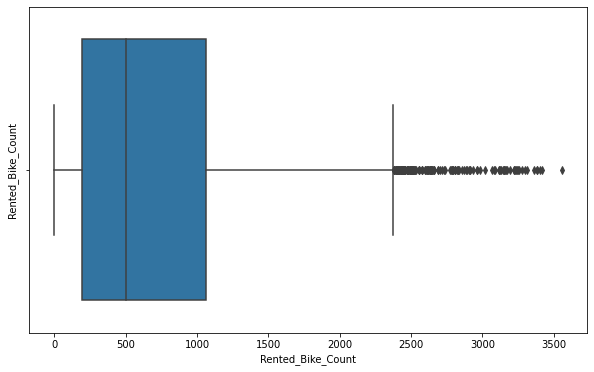

In [291]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

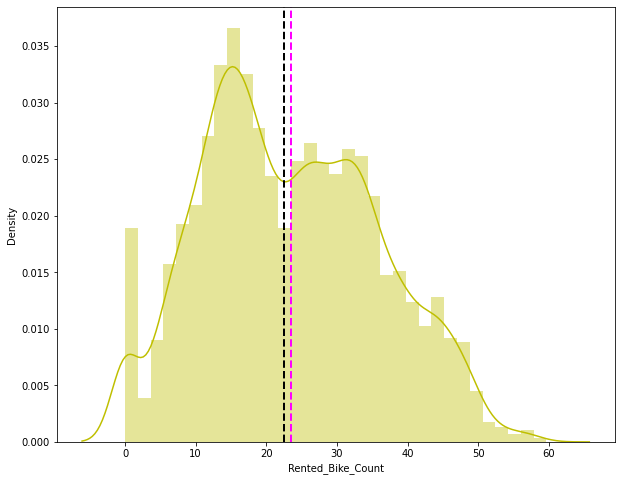

In [292]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

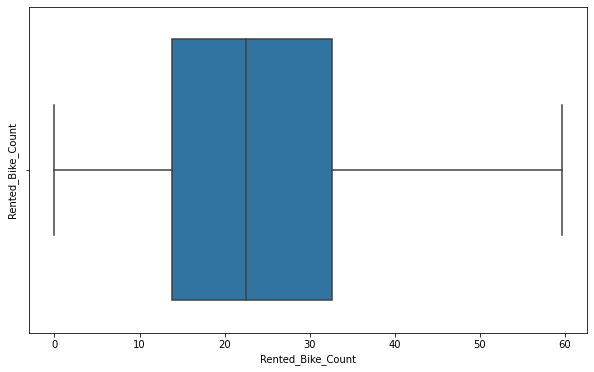

In [293]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***


##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [294]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [295]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [296]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     745.9
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:03:30   Log-Likelihood:                -66823.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   650.1002    106.960      6.078      0.000     440.434     859.766
Temperature              40.1523      4.154      9.666      0.000      32.010      48.295
Humidity                 -7.7780      1.200     -6.480      0.000     -10.131      -5.425
Wind_speed               61.8430      5.961     10.374      0.000      50.158      73.528
Visibility               -0.0100      0.011     -0.916      0.360      -0.031       0.011
Dew_point_temperature    -5.4120      4.393     -1.232      0.218     -14.024       3.200
Solar_Radiation        -122.2291     10.383    -11.772      0.000    -142.582    -101.876
Rainfall               -286.7998     17.903    -16.020      0.000    -321.894    -251.705
Snowfall                 58.9518     23.449      2.514      0.012      12.987     104.916
==============================================================================
Omnibus:                     1000.333   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1702.173
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       4.478   Cond. No.                     3.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.344077,0.064129,-0.280078
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.472300,0.365359,0.078869
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.348096,-0.043856,0.019858
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.152492,-0.253433,-0.103610
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.083780,0.182873,-0.212934
Solar_Radiation,NaN,0.344077,-0.472300,0.348096,0.152492,0.083780,1.000000,-0.120866,-0.081766
Rainfall,NaN,0.064129,0.365359,-0.043856,-0.253433,0.182873,-0.120866,1.000000,-0.001408
Snowfall,NaN,-0.280078,0.078869,0.019858,-0.103610,-0.212934,-0.081766,-0.001408,1.000000


* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***for droping, we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***

###**Heatmap Correlation**

 we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.

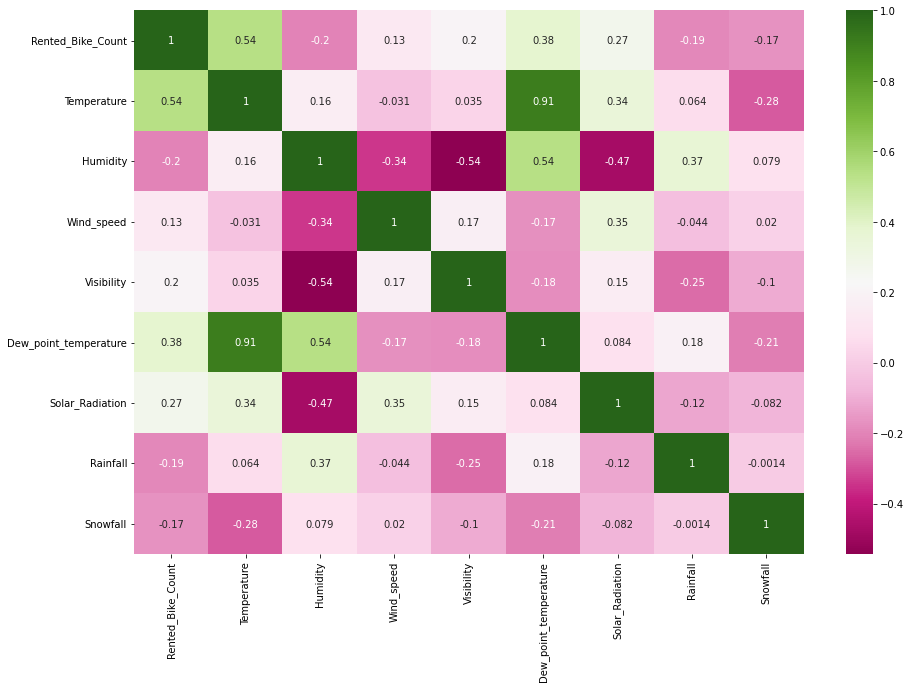

In [298]:
# Creating the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall

In [299]:
#drop the column.
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)


In [300]:
#According to OLS these columns are not nessessary.
bike_df=bike_df.drop(['Snowfall'],axis=1)
bike_df=bike_df.drop(['Visibility'],axis=1)


* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it don't affects the outcome of our analysis. And they have the same variations. so we can drop the column 'Dew point temperature(°C)'.***

## Create the dummy variables 

**A dataset may contain different type of values, sometimes they consist categorical features. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [301]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###one hot encoding
**A one hot encoding allows the representation of categorical data to be more expressive.**

In [335]:
#creating a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head() 

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Hour_1,Hour_2,Hour_3,Hour_4,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [303]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [304]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ['Rented_Bike_Count',]]])

,variables,VIF
0,Temperature,9.976222
1,Humidity,2.062380
2,Wind_speed,1.439860
3,Solar_Radiation,5.391084
4,Rainfall,1.248416
5,Hour_1,1.919891
6,Hour_2,1.923207
7,Hour_3,1.926584
8,Hour_4,1.929458
9,Hour_5,1.936753


In [305]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [306]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 45)
(1752, 45)


In [307]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Rainfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [308]:
#import the packages for linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [309]:
#check the regression score
reg.score(X_train, y_train)

0.8014566676270863

In [310]:
#check the coefficeint
reg.coef_

array([ 4.26212629e-01, -1.04197853e-01, -2.42694343e-02,  1.26750856e+00,
       -9.04111316e+00, -2.36327863e+00, -4.96016446e+00, -7.31331839e+00,
       -9.75396284e+00, -9.40267724e+00, -4.31936356e+00,  1.41346742e+00,
        7.33724088e+00,  1.28695736e+00, -3.44397523e+00, -3.27411949e+00,
       -2.32049826e+00, -2.57545094e+00, -2.52062747e+00, -1.13448289e+00,
        3.26556685e-01,  4.51538053e+00,  1.05354868e+01,  7.45353888e+00,
        6.12511293e+00,  6.56221171e+00,  5.09507225e+00,  1.75909174e+00,
        1.26482406e+11,  1.51628169e+11,  1.58609191e+11,  3.14655035e+00,
        2.86702705e+01, -8.32974157e-01,  3.21267850e+10,  3.21267850e+10,
        3.21267850e+10,  6.98102237e+09,  6.98102236e+09,  6.98102236e+09,
        1.58609191e+11,  1.58609191e+11,  1.58609191e+11,  2.01236089e+00,
       -1.42900220e+00])

In [311]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

##Evaluation Matrix

In [312]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827809633306998
RMSE : 5.552279678952331
MAE : 4.244083742008071
R2 : 0.8014566676270863
Adjusted R2 : 0.7962195926231115


**Looks like our r2 score value is 0.80 that means our model is  able to capture most of the data variance.**

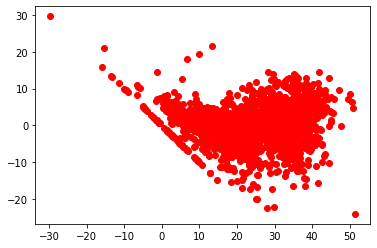

In [313]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='red')

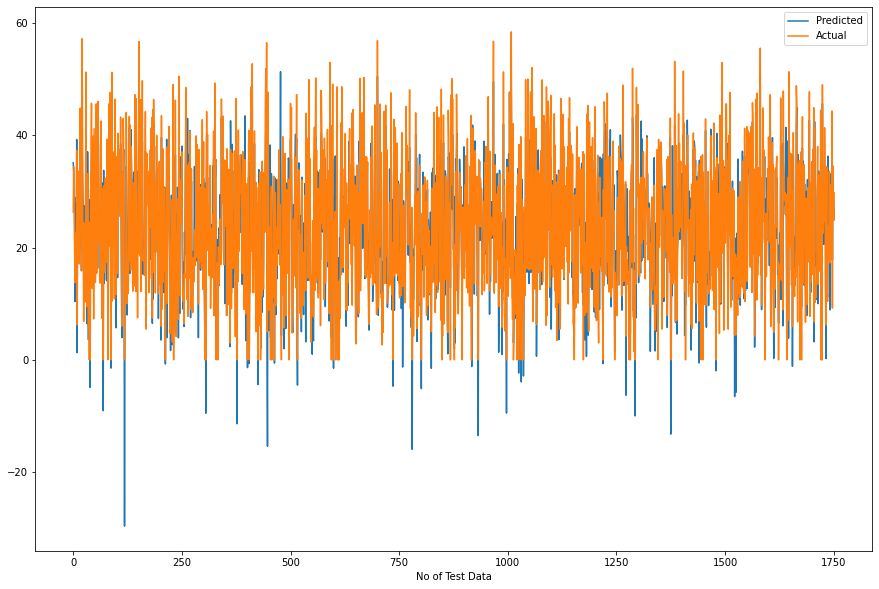

In [314]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [315]:
# storing the Train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [316]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

#**LASSO REGRESSION** 

In [317]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3847772219016671 0.3933621461999468


In [318]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [319]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 94.1926180536763
RMSE : 9.70528814892563
MAE : 7.373290166857704
R2 : 0.3933621461999468
Adjusted R2 : 0.37736056154519737


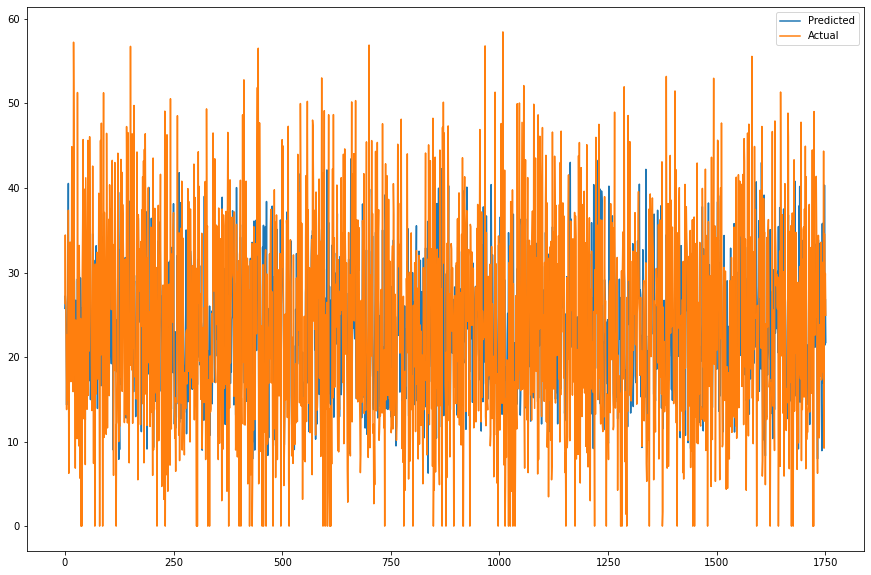

In [320]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

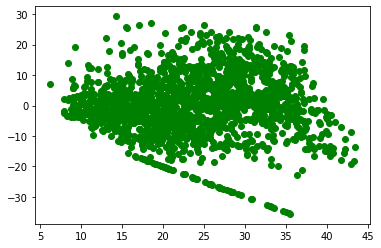

In [321]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso),color='green')

In [322]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [323]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

# **RIDGE REGRESSION**

In [324]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [325]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [326]:
#check the score
ridge.score(X_train, y_train)

0.8014565874134658

In [327]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [328]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827822088070377
RMSE : 5.552280800542276
MAE : 4.244206267480065
R2 : 0.8014565874134658
Adjusted R2 : 0.7962195102936569


**Looks like our r2 score value is 0.80 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

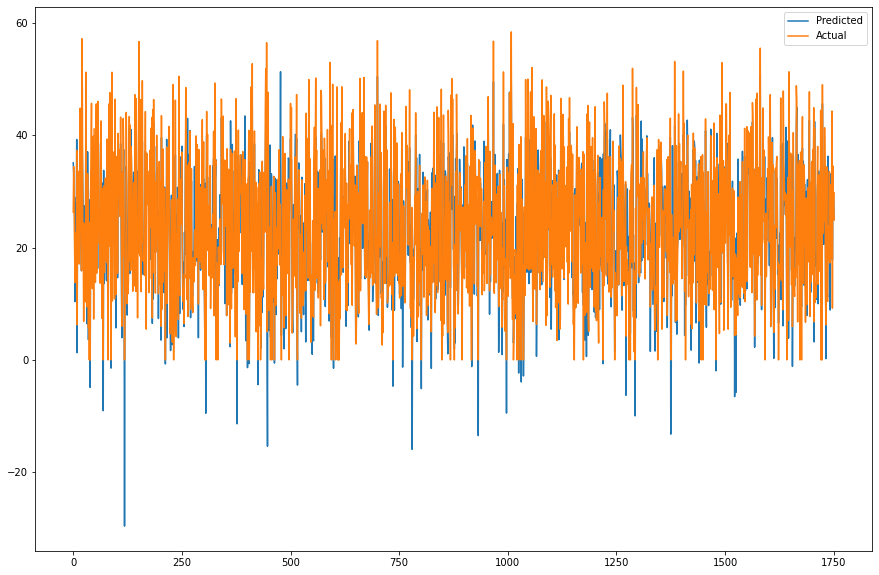

In [329]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

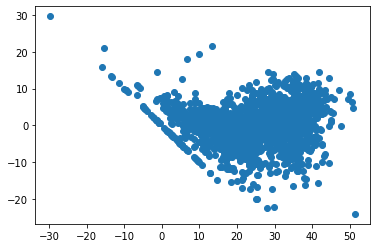

In [330]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

In [331]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [332]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

#**CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [333]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0  Linear regression   4.244  30.828  5.552     0.801   
             1   Lasso regression   7.373  94.193  9.705     0.393   
             2   Ridge regression   4.244  30.828  5.552     0.801   
Test set     0  Linear regression   4.244  30.828  5.552     0.801   
             1   Lasso regression   7.373  94.193  9.705     0.393   
             2   Ridge regression   4.244  30.828  5.552     0.801   

                Adjusted R2  
Training set 0         0.80  
             1         0.38  
             2         0.80  
Test set     0         0.80  
             1         0.38  
             2         0.80


• No overfitting is seen.

• Linear as well as ridge Regression is giving the best score of our model with 80% accuracy.

• Outliers of numerical columns have been treated by trimming method but       outliers of categorical columns have been left as they are because we cant define classed outliers.

• The outliers of Dependent variable are transformed because they can't be changed.

• Our Evalaution matrix shows that there is minimum error in this model.

• We can deploy this model.


However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.